In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

### Q1.3 Write out the forward-pass function in python, call it ff nn ReLu(...)


In [2]:
def relu(z):
    return np.where(z > 0, z, 0)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def ff_nn_Relu(X, W, b, V, c):
    h = relu(np.array(X)@np.array(W)+b)
    return sigmoid(np.dot(h,np.array(V))+c)

### Q1.4 what are the class probabilities associated with the forward pass of each sample?

In [3]:
x = [[1,-1], [0,-1], [0, 1]]
w = [[1, -1, 0, 1], [0, 0, 0.5, 1]]
b = [0, 0, 1, 0]
v = [1, 0, -1, 1]
c = 1

ff_nn_Relu(x,w,b,v,c)

array([0.81757448, 0.62245933, 0.62245933])

### Q2.2 Create a visualization of the contours of this function.

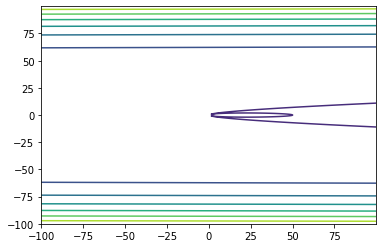

In [4]:
delta = 0.05
x = np.arange(-100.0, 100.0, delta)
y = np.arange(-100.0, 100.0, delta)
X, Y = np.meshgrid(x, y)
Z = 3 - X**3 + 50*(2*(Y**2)-X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

### Q2.3 Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [5]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*(x**2) + 100*x - 200*(y**2)
    df_dy = 800*(y**3) - 400*x*y
    return np.array([df_dx, df_dy])

In [25]:
def grad_descent(starting_point=None, iterations=10, learning_rate=1):
    if starting_point is None:
        point = np.random.uniform(-10,10,size=2)
    else:
        point = starting_point
    trajectory = [point]
            
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate*grad
        trajectory.append(point)
    return np.array(trajectory)

**Learning rate = 0.0001**

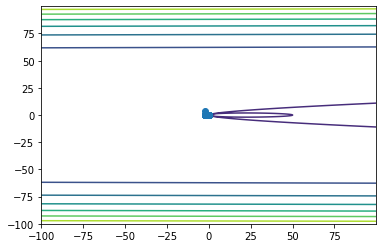

In [31]:
traj = grad_descent(iterations=50000,learning_rate = 0.0001)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

**Learning Rate = 0.00001**

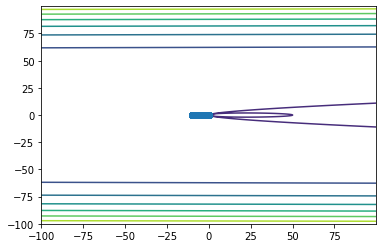

In [26]:
traj = grad_descent(iterations=100000,learning_rate = 0.00001)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

**Learning rate = 0.000001**

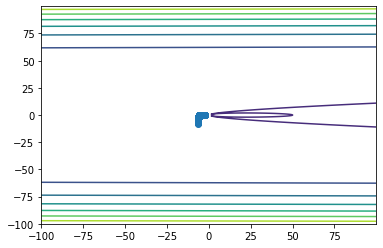

In [22]:
traj = grad_descent(iterations=10000,learning_rate = 0.000001)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### Q2.4 Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.


In [37]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is None:
        point = np.random.uniform(-10,10,size=2)
    else:
        point = starting_point
    trajectory = [point]
    v = np.zeros(point.size)        
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha * v + epsilon * grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

**epsilon=0.0001, alpha=0.9**

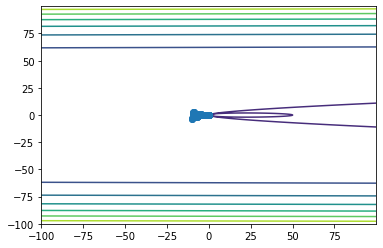

In [39]:

traj = grad_descent_with_momentum(iterations=10000,alpha=0.9,epsilon=0.00001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

**epsilon=0.00001, alpha=0.5**

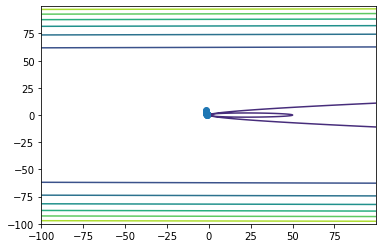

In [40]:
np.random.seed(1)
traj = grad_descent_with_momentum(iterations=50, epsilon=0.00001, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

**epsilon=0.00001, alpha=0.1**

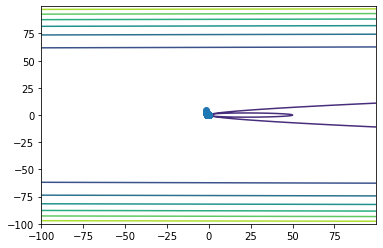

In [41]:
np.random.seed(1)
traj = grad_descent_with_momentum(iterations=10000,alpha=0.1,epsilon=0.00001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### Q3.2 Write a function grad_f(...) that takes in a weights vector and returns the gradient of the Loss at that location

In [18]:
def loss(y, y_hat):
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def yhat(x, W, b, v, c): 
    h = relu(np.dot(x,W) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y

def binary_xent_residual(y, y_hat):
    return (y/y_hat - (1-y)/(1-y_hat))

def pack_params(param_vec):
    w_11, w_12, w_13, w_14, w_21, w_22, w_23, w_24, b_1, b_2,b_3, b_4, v_1, v_2, v_3, v_4, c = param_vec
    W = np.array([[w_11, w_12, w_13, w_14],[w_21, w_22, w_23, w_24]])
    b = np.array([b_1, b_2, b_3, b_4])
    v = np.array([v_1,v_2, v_3, v_4])
    c = np.array([c])
    return((W, b, v, c))

In [19]:
def grad_f(param_vec, x, y):   
    W, b, v, c = pack_params(param_vec)
    
    a = np.dot(x,W)+b
    h = relu(a)
    y_a = np.dot(h,v)+c
    y_hat = sigmoid(y_a)
    
    dL_dc = np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a))
    
    dL_dv1 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,0])
    dL_dv2 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,1])
    dL_dv3 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,2])
    dL_dv4 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,3])
    
    dL_db1 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]))
    dL_db2 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]))
    dL_db3 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]))
    dL_db4 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]))

    dL_dw11 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,0])
    dL_dw12 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,0])
    dL_dw13 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]) * x[:,0])
    dL_dw14 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]) * x[:,0])

    dL_dw21 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,1])
    dL_dw22 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,1])
    dL_dw23 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]) * x[:,1])
    dL_dw24 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]) * x[:,1])
    
    return np.array([dL_dw11, dL_dw12, dL_dw13, dL_dw14, 
                     dL_dw21, dL_dw22, dL_dw23, dL_dw24,
                     dL_db1, dL_db2, dL_db3, dL_db4, 
                     dL_dv1, dL_dv2, dL_dv3, dL_dv4,dL_dc])

### Q3.3 Generate a synthetic dataset like the XOR pattern

In [20]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y = np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1

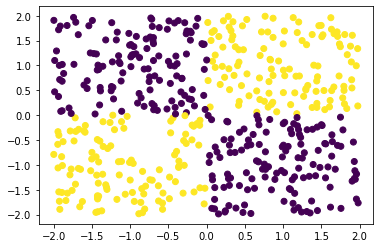

In [21]:
plt.scatter(x[:,0],x[:,1],c=y)

### Q3.4 Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [22]:
def grad_descent(x, y,  iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=17).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point + learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

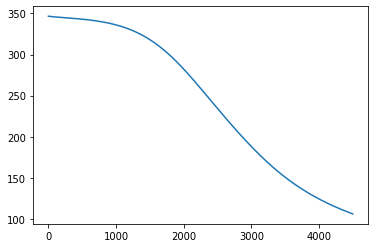

In [25]:
traj, losses = grad_descent(x, y, iterations=4500,learning_rate=1e-2)
plt.plot(losses)

### Q3.5 Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [29]:
def grad_descent_with_momentum(x, y, iterations=10, epsilon=2, alpha=.5):

    point = np.random.uniform(-.1,.1,size=17).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    v = np.zeros(point.size)
    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha * v + epsilon * grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

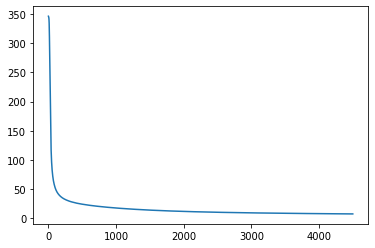

In [31]:
traj, losses = grad_descent_with_momentum(x, y, iterations = 4500,epsilon = -1, alpha = .5)
plt.plot(losses)

The model seems to converge more efficiently with Momentum.

### Q3.6 Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

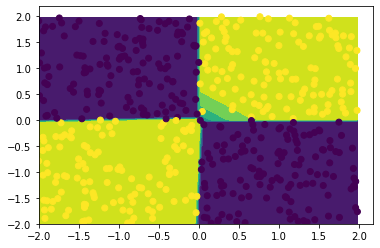

In [32]:
delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
YHAT = yhat(np.array((X1.ravel(),X2.ravel())).T, *pack_params(traj[-1])).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, YHAT)

plt.scatter(x[:,0],x[:,1],c=y)